# Questions to be answered.
1.	Plot the distribution of Overall rating for all players. 
2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?

4.	Generate tables containing the top 5 players by Overall rating for each unique position.
a)	Are there any players appearing in more than one Table. Please point out such players.
b)	What is the average wage one can expect to pay for the top 5 in every position?

## Steps to be Followed

1. Importing neccessary libraries for viewing and preprocessing data.
2. Data Preprocessing
3. Exploratory Data Analysis

**Importing neccessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('fifa.csv')

In [3]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


**Data Preprocessing**

In [4]:
null_percentage=data.isna().sum()/len(data)*100
null_percentage[null_percentage>0]

Club                         1.323667
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling                    0.263635
Curve                        0.263635
FKAccuracy                   0.263635
LongPassing                  0.263635
BallControl                  0.263635
Acceleration                 0.263635
SprintSpeed                  0.263635
Agility     

Column has a null percentage of 93.057615 so we drop the column

In [5]:
data.drop('Loaned From',axis=1,inplace=True)

In [6]:
#data.dropna(thresh=53,inplace=True)

# Column Conversion

In [7]:
# Convert 'Value' to Float after getting rid of currency symbol and suffix.
data['Value']=data['Value'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')

In [8]:
data['Value']=data['Value'].str.split(' ', expand=True)[0].astype(float)*data['Value'].str.split(' ', expand=True)[1].astype(float)

In [9]:
# Convert 'Wage' to Float after getting rid of currency symbol and suffix.
data['Wage']=data['Wage'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')

In [10]:
data['Wage']=data['Wage'].str.split(' ', expand=True)[0].astype(float)*data['Wage'].str.split(' ', expand=True)[1].astype(float)

In [11]:
data[['Value','Wage']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   17955 non-null  float64
 1   Wage    17966 non-null  float64
dtypes: float64(2)
memory usage: 284.6 KB


In [12]:
#Convert 'Joined' to int with only year

In [13]:
data['Joined']=data['Joined'].str.slice(-4)

In [14]:
#Filling null values with year 3000
data['Joined']=data['Joined'].fillna('3000')

In [15]:
data['Joined'].isna().sum()

0

In [16]:
data[['Joined']]=data[['Joined']].astype('int64')

In [17]:
data[['Joined']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Joined  18207 non-null  int64
dtypes: int64(1)
memory usage: 142.4 KB


In [18]:
data['Joined'].sample(5)

12572    2014
17555    2018
10980    2018
7812     2018
16362    2018
Name: Joined, dtype: int64

In [19]:
#Convert to datetime type

In [20]:
data['Contract Valid Until']=pd.to_datetime(data['Contract Valid Until'])

In [21]:
data[['Contract Valid Until']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Contract Valid Until  17918 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 142.4 KB


In [22]:
#Convert to Float with decimal points

In [23]:
data['Height']=data['Height'].str.replace('\'','.')

In [24]:
data['Height'].head()

0     5.7
1     6.2
2     5.9
3     6.4
4    5.11
Name: Height, dtype: object

In [25]:
#Remove the suffix and convert to float

In [26]:
data['Weight']=data['Weight'].str.slice(0,-3,1)

In [27]:
data['Weight'].head()

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: object

In [28]:
data['Weight']=data['Weight'].astype('float64')

In [29]:
data[['Weight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  18159 non-null  float64
dtypes: float64(1)
memory usage: 142.4 KB


In [30]:
#Convert to Float after getting rid of currency symbol and suffix.

In [31]:
data['Release Clause']=data['Release Clause'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')
data['Release Clause']=data['Release Clause'].str.split(' ', expand=True)[0].astype(float)*data['Release Clause'].str.split(' ', expand=True)[1].astype(float)

In [32]:
data['Release Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

In [33]:
data[['Release Clause']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Release Clause  16643 non-null  float64
dtypes: float64(1)
memory usage: 142.4 KB


# Null Handling

In [34]:
data.isna().sum().value_counts()

48      42
0       10
241      2
60       2
252      1
289      1
1564     1
dtype: int64

We are going with mean imputation forthe below columns which are required for analysis

In [35]:
data['International Reputation']=data['International Reputation'].fillna(data['International Reputation'].mean())

In [36]:
data['Height']=data['Height'].astype('float64')
data['Height']=data['Height'].fillna(data['Height'].mean())

In [37]:
data['Weight']=data['Weight'].fillna(data['Weight'].mean())

In [38]:
data['Position']=data['Position'].fillna(data['Position'].mode()[0])

In [39]:
data['Release Clause'].describe()

count    1.664300e+04
mean     4.585061e+06
std      1.111872e+07
min      1.300000e+04
25%      5.250000e+05
50%      1.100000e+06
75%      3.500000e+06
max      2.281000e+08
Name: Release Clause, dtype: float64

E:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Release Clause'>

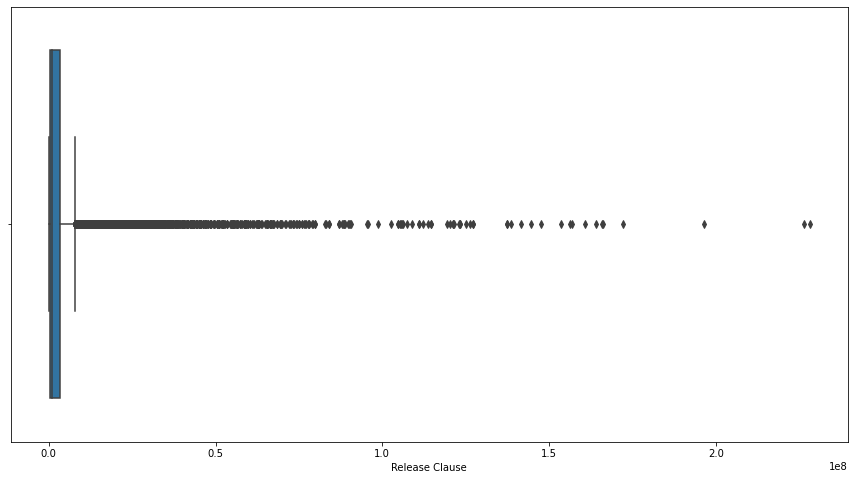

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(data['Release Clause'])

For Release Clause column we are going with median as it consists of extreme values

In [41]:
data['Release Clause']=data['Release Clause'].fillna(data['Release Clause'].median())

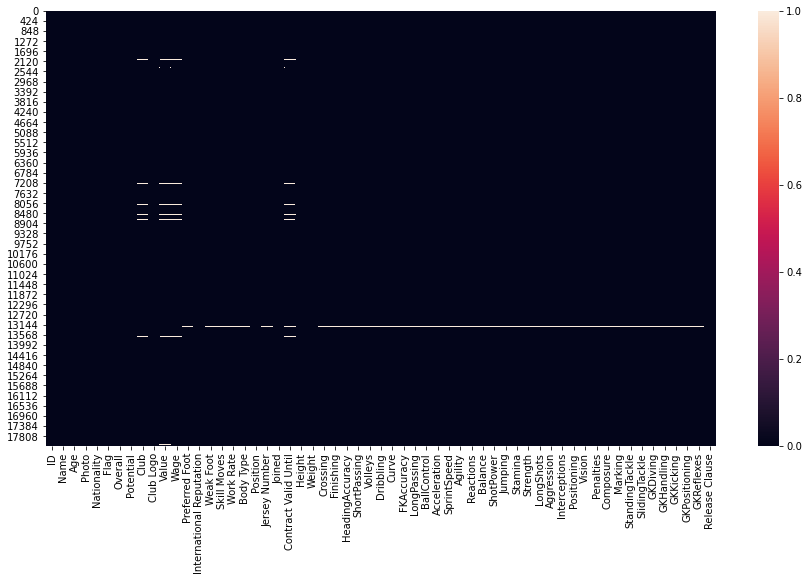

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(data.isna())
plt.savefig('htmp.png')

# Exploratory Data Analysis

# 1.	Plot the distribution of Overall rating for all players

E:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


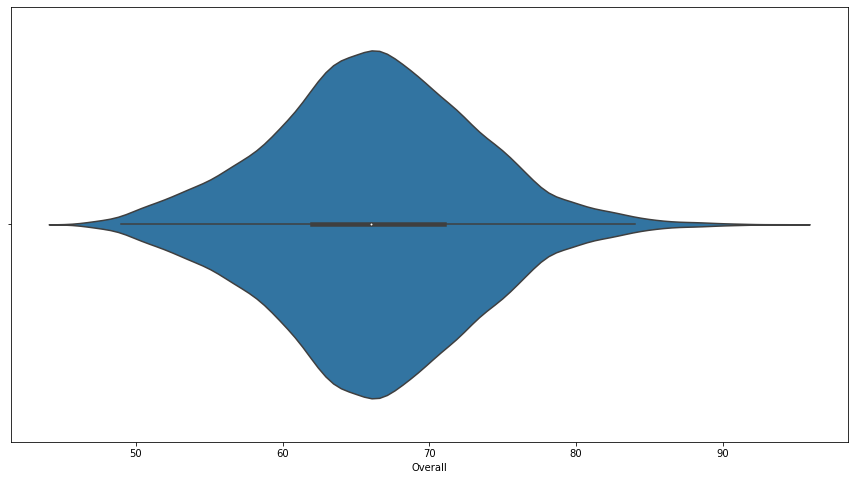

In [43]:
plt.figure(figsize=(15,8))
sns.violinplot(data['Overall'])
plt.savefig('overall.png')

E:\anacoda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


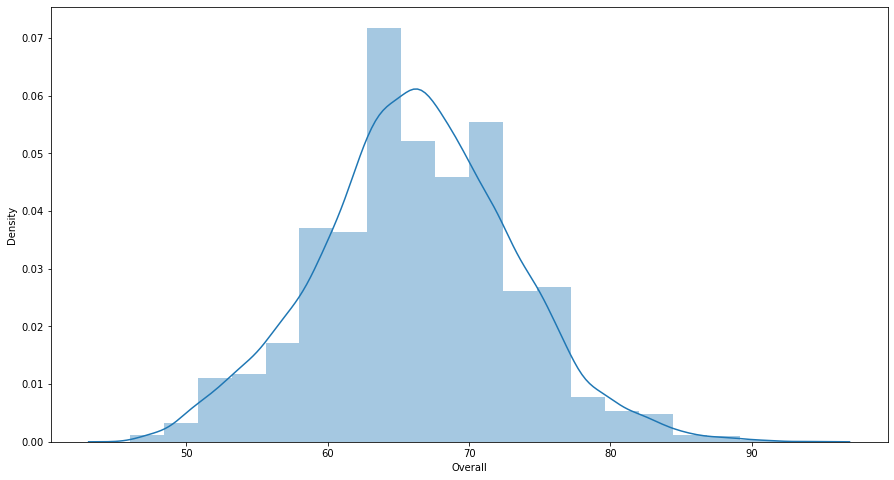

In [44]:
plt.figure(figsize=(15,8))
sns.distplot(data['Overall'],bins=20)
plt.savefig('overall_dist.png')

Overall rating of the players are normally distributed with mean and median near 65. The distribution is left skewed

# 2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [45]:
df=data[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']]

In [46]:
df.head()

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
0,94,110500000.0,565000.0,5.0,5.70,159.0,226500000.0
1,94,77000000.0,405000.0,5.0,6.20,183.0,127100000.0
2,92,118500000.0,290000.0,5.0,5.90,150.0,228100000.0
3,91,72000000.0,260000.0,4.0,6.40,168.0,138600000.0
4,91,102000000.0,355000.0,4.0,5.11,154.0,196400000.0


In [47]:
df.isna().sum()

Overall                       0
Value                       252
Wage                        241
International Reputation      0
Height                        0
Weight                        0
Release Clause                0
dtype: int64

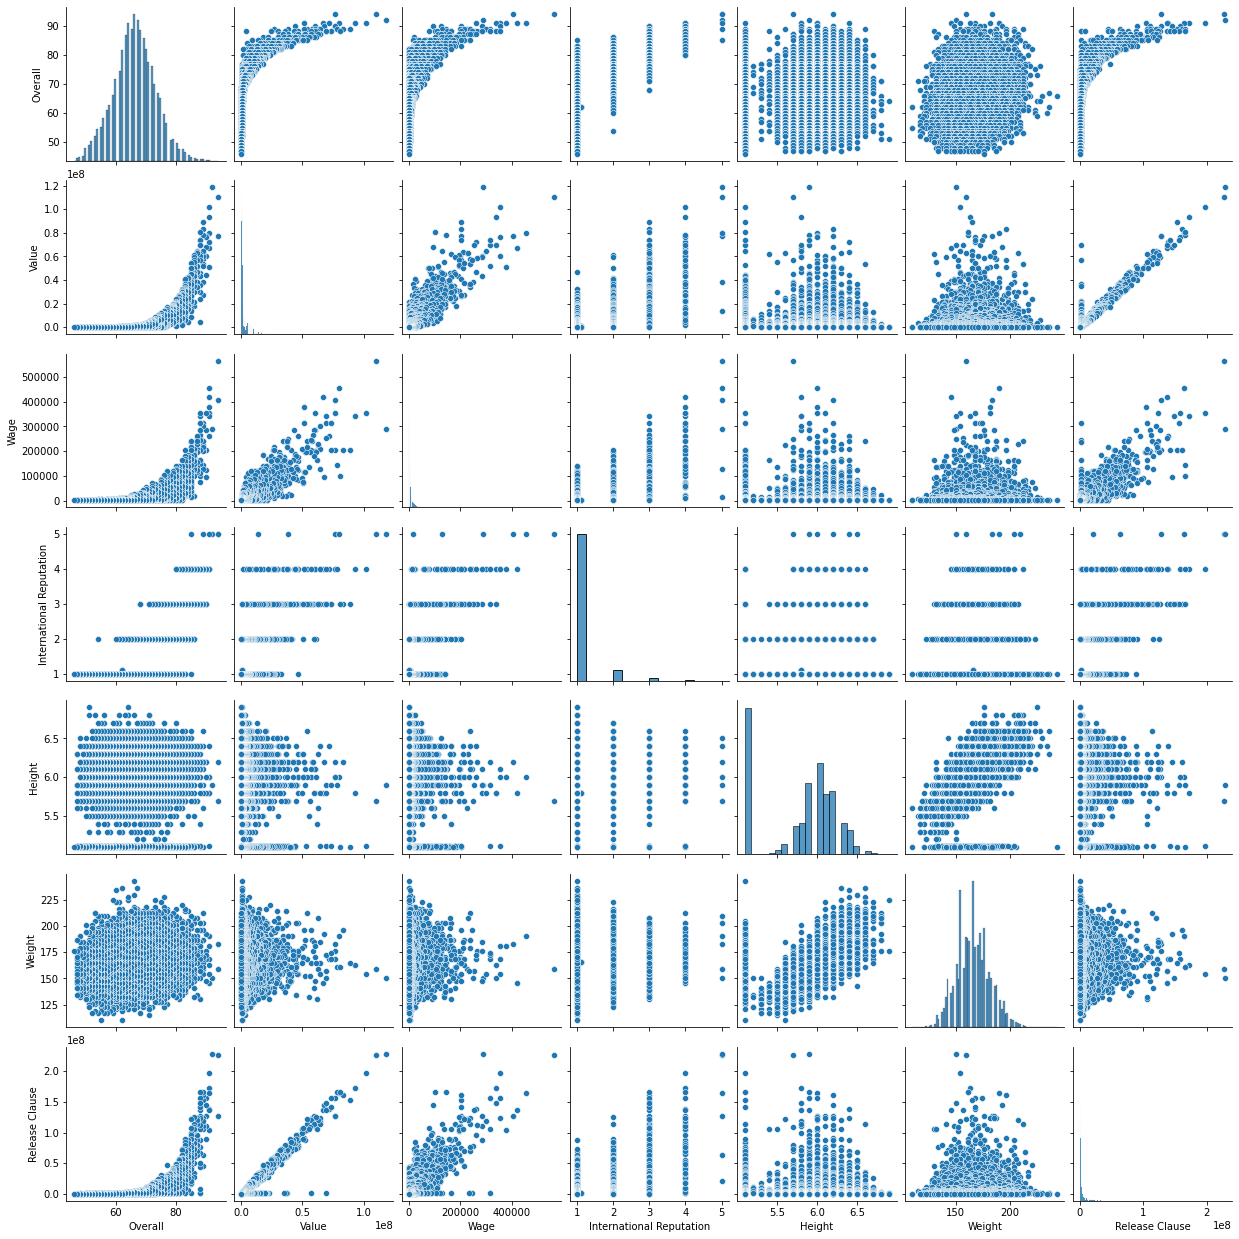

In [48]:
sns.pairplot(df)
plt.savefig('pairplot.png')

# 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [49]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [50]:
df_ov=data.sort_values('Overall',ascending=False)
df_ov=df_ov[df_ov['Contract Valid Until'].dt.year==2020]

In [51]:
df_ov['PlayerRank']=df_ov.Overall.rank(method='min',ascending=False)

In [52]:
df_ov[['Overall','PlayerRank','Contract Valid Until']].shape

(4044, 3)

In [53]:
top=df_ov[df_ov['PlayerRank']<=20]

In [54]:
top

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PlayerRank
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,2012,2020-01-01,5.80,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,1.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,Lean,RCM,10.0,2012,2020-01-01,5.80,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,1.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,15.0,2005,2020-01-01,6.00,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,1.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,60000000.0,285000.0,Left,4.0,2.0,4.0,High/ Medium,Normal,LCM,21.0,2010,2020-01-01,5.80,148.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,5.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,27000000.0,215000.0,Left,4.0,3.0,2.0,Medium/ High,Normal,LCB,3.0,2005,2020-01-01,6.20,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,6.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,60000000.0,200000.0,Right,4.0,4.0,3.0,High/ High,Lean,LS,21.0,2013,2020-01-01,6.10,170.0,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,6.0
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,24000000.0,165000.0,Right,4.0,3.0,2.0,Me

# a)	What would the average wage for this set of players be?

In [55]:
print('Average wage of this set of players is',top.Wage.mean())

Average wage of this set of players is 190521.73913043478


# b)	What is the average age?

In [56]:
print('Average age of this set of players is',top.Age.mean())

Average age of this set of players is 30.347826086956523


# c)	Is there a correlation between the Overall rating and Value for these players?

In [57]:
top[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.729632
Value,0.729632,1.000000


<AxesSubplot:>

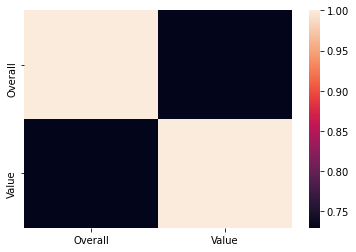

In [58]:
sns.heatmap(top[['Overall','Value']].corr())

E:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


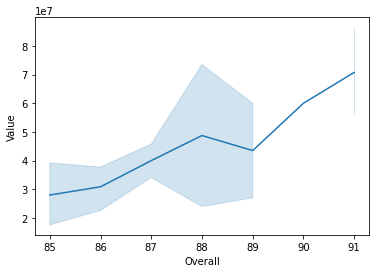

In [59]:
sns.lineplot(top['Overall'],top['Value'])
plt.savefig('Value.png')

There is a correlation between the Overall rating and Value for these players, with increase in overall rating 76% chances are the that Value will also increase

# 4.	Generate tables containing the top 5 players by Overall rating for each unique position

In [60]:
data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [61]:
df_pos=data.groupby('Position',group_keys=False)
df_top=df_pos.apply(lambda x:x.sort_values('Overall',ascending=False).head())

In [62]:
df_top[['Overall','Position','Name']]

,Overall,Position,Name
17,89,CAM,A. Griezmann
31,88,CAM,C. Eriksen
61,86,CAM,Roberto Firmino
66,86,CAM,T. Müller
74,86,CAM,M. Özil
...,...,...,...
1,94,ST,Cristiano Ronaldo
10,90,ST,R. Lewandowski
16,89,ST,H. Kane
23,89,ST,S. Agüero


In [63]:
df_top.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,78000000.0,145000.0,Left,4.0,3.0,4.0,High/ High,Lean,CAM,7.0,2014,2023-01-01,5.90,161.0,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,73500000.0,205000.0,Right,3.0,5.0,4.0,High/ Medium,Lean,CAM,10.0,2013,2020-01-01,5.11,168.0,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
61,201942,Roberto Firmino,26,https://cdn.sofifa.org/players/4/19/201942.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,87,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,53000000.0,195000.0,Right,3.0,4.0,4.0,High/ High,Lean,CAM,9.0,2015,2023-01-01,5.11,168.0,72.0,87.0,77.0,86.0,81.0,87.0,80.0,65.0,75.0,88.0,78.0,77.0,80.0,86.0,81.0,81.0,81.0,90.0,74.0,76.0,73.0,58.0,87.0,85.0,72.0,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
66,189596,T. Müller,28,https://cdn.sofifa.org/players/4/19/189596.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,45000000.0,135000.0,Right,4.0,4.0,3.0,High/ High,Lean,CAM,13.0,2008,2021-01-01,6.10,165.0,79.0,87.0,82.0,83.0,84.0,75.0,81.0,59.0,72.0,82.0,73.0,75.0,75.0,91.0,72.0,78.0,81.0,87.0,68.0,80.0,57.0,58.0,92.0,85.0,60.0,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
74,176635,M. Özil,29,https://cdn.sofifa.org/players/4/19/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,Arsenal,https://cdn.sofifa.org/teams/2/light/1.png,43500000.0,190000.0,Left,4.0,2.0,4.0,Medium/ Low,Lean,CAM,10.0,2013,2021-01-01,5.11,168.0,83.0,73.0,54.0,89.0,80.0,84.0,84.0,77.0,82.0,90.0,72.0,69.0,79.0,84.0,70.0,70.0,48.0,69.0,57.0,75.0,48.0,24.0,83.0,91.0,67.0,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0


In [64]:
grp=df_top.groupby('Position')
g=list(grp)

In [65]:
len(df_top.Position.unique())

27

Since there are 27 unique positions each table having top 5 players from all unique position can be accessed by g[n][1]
where n=1 to 27 in accordance with the positions

In [66]:
g[2][1]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,51500000.0,315000.0,Right,4.0,3.0,3.0,Medium/ Medium,Lean,CDM,5.0,2008,2023-01-01,6.2,168.0,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,105600000.0
27,200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,59500000.0,285000.0,Right,3.0,3.0,2.0,Medium/ High,Normal,CDM,14.0,2013,2021-01-01,6.1,185.0,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,126400000.0
72,180206,M. Pjanić,28,https://cdn.sofifa.org/players/4/19/180206.png,Bosnia Herzegovina,https://cdn.sofifa.org/flags/8.png,86,86,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,44000000.0,180000.0,Right,3.0,4.0,3.0,Medium/ Medium,Normal,CDM,5.0,2016,2023-01-01,5.1,159.0,80.0,60.0,60.0,89.0,72.0,86.0,86.0,92.0,85.0,89.0,66.0,66.0,77.0,84.0,79.0,78.0,61.0,78.0,66.0,82.0,70.0,78.0,70.0,88.0,79.0,86.0,75.0,74.0,70.0,7.0,7.0,13.0,7.0,8.0,72600000.0
75,135507,Fernandinho,33,https://cdn.sofifa.org/players/4/19/135507.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,18000000.0,185000.0,Right,3.0,4.0,3.0,Medium/ High,Lean,CDM,25.0,2013,2020-01-01,5.1,148.0,68.0,69.0,63.0,85.0,74.0,77.0,70.0,72.0,81.0,82.0,68.0,67.0,72.0,86.0,78.0,83.0,76.0,79.0,76.0,78.0,87.0,88.0,70.0,75.0,61.0,79.0,85.0,85.0,80.0,12.0,11.0,5.0,13.0,7.0,33300000.0
118,209499,Fabinho,24,https://cdn.sofifa.org/players/4/19/209499.png,Brazil,https://cdn.sofifa.org/flags/54.png,84,88,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,34000000.0,120000.0,Right,3.0,2.0,3.0,Medium/ Medium,Lean,CDM,3.0,2018,2023-01-01,6.2,172.0,79.0,66.0,75.0,83.0,47.0,76.0,71.0,53.0,78.0,82.0,69.0,72.0,69.0,83.0,67.0,78.0,75.0,92.0,79.0,65.0,85.0,84.0,70.0,75.0,91.0,84.0,83.0,86.0,84.0,13.0,12.0,6.0,8.0,8.0,67200000.0


Above is the table for position CDM

# a)	Are there any players appearing in more than one Table. Please point out such players.

In [67]:
players=data.Name.value_counts()
players[players>1]

J. Rodríguez     11
Paulinho          8
R. Williams       7
J. Williams       7
J. Gómez          6
                 ..
João Teixeira     2
H. Abe            2
Ewerton           2
Nacho             2
C. Wood           2
Name: Name, Length: 762, dtype: int64

Above players appearing in more than one Table

# b)	What is the average wage one can expect to pay for the top 5 in every position?

In [68]:
df_wage=df_top.groupby('Position')[['Wage']].mean()

In [69]:
df_wage=df_wage.reset_index()

E:\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


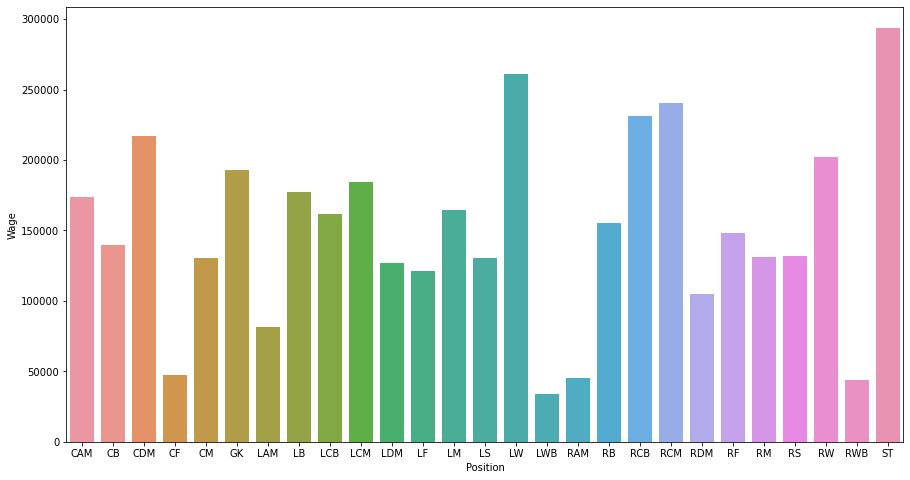

In [70]:
plt.figure(figsize=(15,8))
sns.barplot(df_wage['Position'],df_wage['Wage'])
plt.savefig('wage.png')

In [71]:
df_wage

,Position,Wage
0,CAM,174000.0
1,CB,139600.0
2,CDM,217000.0
3,CF,47400.0
4,CM,130600.0
5,GK,192800.0
6,LAM,81600.0
7,LB,177200.0
8,LCB,162000.0
9,LCM,184400.0


The average wage one can expect to pay for the top 5 in every position is shown above